In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/lamb/1 (103).jpg
/kaggle/input/dataset/lamb/1 (60).jpg
/kaggle/input/dataset/lamb/1 (18).jpg
/kaggle/input/dataset/lamb/1 (4).jpg
/kaggle/input/dataset/lamb/1 (41).jpg
/kaggle/input/dataset/lamb/1 (44).jpg
/kaggle/input/dataset/lamb/1 (49).jpg
/kaggle/input/dataset/lamb/1 (38).jpg
/kaggle/input/dataset/lamb/1 (56).jpg
/kaggle/input/dataset/lamb/1 (19).jpg
/kaggle/input/dataset/lamb/1 (25).jpg
/kaggle/input/dataset/lamb/1 (51).jpg
/kaggle/input/dataset/lamb/1 (28).jpg
/kaggle/input/dataset/lamb/1 (73).jpg
/kaggle/input/dataset/lamb/1 (34).jpg
/kaggle/input/dataset/lamb/1 (47).jpg
/kaggle/input/dataset/lamb/1 (96).jpg
/kaggle/input/dataset/lamb/1 (66).jpg
/kaggle/input/dataset/lamb/1 (6).jpg
/kaggle/input/dataset/lamb/1 (81).jpg
/kaggle/input/dataset/lamb/1 (13).jpg
/kaggle/input/dataset/lamb/1 (88).jpg
/kaggle/input/dataset/lamb/1 (53).jpg
/kaggle/input/dataset/lamb/1 (24).jpg
/kaggle/input/dataset/lamb/1 (1).jpg
/kaggle/input/dataset/lamb/1 (90).jpg
/kaggle/input/

In [25]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"📁 Directory: {dirname}")
    for filename in filenames:
        print(f"  📄 File: {filename}")


📁 Directory: /kaggle/input
📁 Directory: /kaggle/input/dataset
📁 Directory: /kaggle/input/dataset/lamb
  📄 File: 1 (103).jpg
  📄 File: 1 (60).jpg
  📄 File: 1 (18).jpg
  📄 File: 1 (4).jpg
  📄 File: 1 (41).jpg
  📄 File: 1 (44).jpg
  📄 File: 1 (49).jpg
  📄 File: 1 (38).jpg
  📄 File: 1 (56).jpg
  📄 File: 1 (19).jpg
  📄 File: 1 (25).jpg
  📄 File: 1 (51).jpg
  📄 File: 1 (28).jpg
  📄 File: 1 (73).jpg
  📄 File: 1 (34).jpg
  📄 File: 1 (47).jpg
  📄 File: 1 (96).jpg
  📄 File: 1 (66).jpg
  📄 File: 1 (6).jpg
  📄 File: 1 (81).jpg
  📄 File: 1 (13).jpg
  📄 File: 1 (88).jpg
  📄 File: 1 (53).jpg
  📄 File: 1 (24).jpg
  📄 File: 1 (1).jpg
  📄 File: 1 (90).jpg
  📄 File: 1 (78).jpg
  📄 File: 1 (102).jpg
  📄 File: 1 (79).jpg
  📄 File: 1 (94).jpg
  📄 File: 1 (54).jpg
  📄 File: 1 (69).jpg
  📄 File: 1 (42).jpg
  📄 File: 1 (95).jpg
  📄 File: 1 (62).jpg
  📄 File: 1 (67).jpg
  📄 File: 1 (10).jpg
  📄 File: 1 (22).jpg
  📄 File: 1 (61).jpg
  📄 File: 1 (64).jpg
  📄 File: 1 (71).jpg
  📄 File: 1 (9).jpg
  📄 File: 1 (107).

In [26]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [27]:
DATASET_PATH = '/kaggle/input/dataset'
CLASS_NAMES = ['cat', 'dog', 'cow', 'lamb', 'zebra']
IMAGE_SIZE = (64, 64)

In [28]:
def extract_hog_features(image_path):
    image = imread(image_path, as_gray=True)
    image_resized = resize(image, IMAGE_SIZE)
    features = hog(image_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    return features

In [30]:
def load_dataset():
    features = []
    labels = []
    for label, class_name in enumerate(CLASS_NAMES):
        folder = os.path.join(DATASET_PATH, class_name)
        for filename in tqdm(os.listdir(folder), desc=f"Loading {class_name}"):
            file_path = os.path.join(folder, filename)
            try:
                features.append(extract_hog_features(file_path))
                labels.append(label)
            except Exception as e:
                print(f"Error with file {filename}: {e}")
    return np.array(features), np.array(labels)

print("📥 Loading images...")
X, y = load_dataset()
print(f"✅ Loaded {len(X)} samples.")

📥 Loading images...


Loading zebra: 100%|██████████| 108/108 [00:15<00:00,  6.89it/s]

✅ Loaded 532 samples.


In [31]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

In [32]:
print(f"📊 Split: Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}")

📊 Split: Train=318, Val=107, Test=107


In [33]:
clf = DecisionTreeClassifier(max_depth=15, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0)

In [34]:
val_preds = clf.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
print(f"\n🔍 Validation Accuracy: {val_acc:.2f}")


🔍 Validation Accuracy: 0.22


In [35]:
test_preds = clf.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, test_preds, target_names=CLASS_NAMES))


✅ Test Accuracy: 0.31

📋 Classification Report:
              precision    recall  f1-score   support

         cat       0.44      0.32      0.37        22
         dog       0.47      0.38      0.42        21
         cow       0.31      0.25      0.28        20
        lamb       0.19      0.23      0.20        22
       zebra       0.26      0.36      0.30        22

    accuracy                           0.31       107
   macro avg       0.33      0.31      0.31       107
weighted avg       0.33      0.31      0.31       107



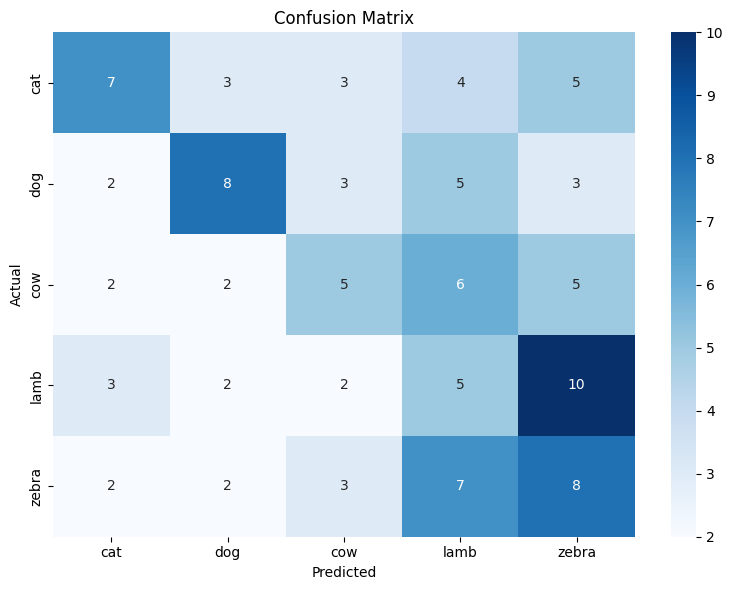

In [ ]:
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show() 